<a href="https://colab.research.google.com/github/AISSA1222/emnist/blob/main/hand_writing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - **we started with the installing EMNIST wich contain lowercase and upperces  caracters**

---


In [ ]:
!pip install extra_keras_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy  as np
from keras import layers, models
from keras.layers import BatchNormalization,Activation,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  Adam,SGD,RMSprop
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
import skimage.io as skio
import skimage.viewer as skview
from extra_keras_datasets import emnist
import matplotlib.pyplot as plt


<ipython-input-2-2e331f087eb1>:9: UserWarning: Viewer requires Qt
  import skimage.viewer as skview


2-**loading dataset** 

In [ ]:
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='letters')

743900280/743900280 [==============================] - 15s 0us/step


**3-normaliser dataset**

In [ ]:

target_train = target_train -1
target_test = target_test -1
input_train = input_train/255.0
input_test = input_test/255.0

**4-show sample of data** 

19


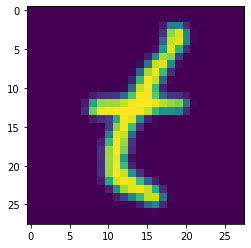

In [ ]:

sample = 540
image = input_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image)

print(target_train[sample])


plt.show()

**5-reshape data**

In [ ]:

input_train = input_train.reshape((input_train.shape[0], 28, 28, 1))
input_test = input_test.reshape((input_test.shape[0], 28, 28, 1))

**6-hot encoding the labels**

In [ ]:

target_train = to_categorical(target_train,26)
target_test = to_categorical(target_test,26)
print(target_test.shape)



(20800, 26)


**7- build CNN model**

In [ ]:
my_model = Sequential()

my_model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(layers.BatchNormalization())
my_model.add(layers.MaxPool2D(pool_size = (2, 2), strides = 2))
my_model.add(layers.Dropout(0.25))

my_model.add(layers.Conv2D(filters = 64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
my_model.add(layers.BatchNormalization())
my_model.add(layers.MaxPool2D(pool_size = (2, 2), strides = 2))
my_model.add(layers.Dropout(0.25))

my_model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
my_model.add(layers.BatchNormalization())
my_model.add(layers.MaxPool2D(pool_size = (2, 2), strides = 2))
my_model.add(layers.Dropout(0.25))





my_model.add(layers.Flatten())
my_model.add(layers.Dropout(0.25))

my_model.add(layers.Dense(512, activation = "relu"))
my_model.add(layers.Dropout(0.25))

my_model.add(layers.Dense(128, activation = "relu"))
my_model.add(layers.Dropout(0.25))
my_model.add(layers.Dense(26, activation = "softmax"))

**8-statistics about the model**




In [ ]:
print(my_model.summary())

**9-compiling the model by adding the loss function and error optimizer**

In [ ]:
opt = Adam(lr = 0.001) 
my_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy']) 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**`10-training the model `**

In [ ]:
history = my_model.fit(
    
    input_train, target_train, epochs=60, batch_size=100, validation_data=(input_test, target_test), verbose=1,shuffle=True
)
my_model.save("handwritten32.h5")

Epoch 1/60
1248/1248 [==============================] - 18s 7ms/step - loss: 0.7131 - accuracy: 0.7783 - val_loss: 0.2319 - val_accuracy: 0.9210
Epoch 2/60
1248/1248 [==============================] - 9s 7ms/step - loss: 0.3228 - accuracy: 0.8964 - val_loss: 0.1986 - val_accuracy: 0.9342
Epoch 3/60
1248/1248 [==============================] - 8s 7ms/step - loss: 0.2765 - accuracy: 0.9102 - val_loss: 0.1872 - val_accuracy: 0.9344
Epoch 4/60
1248/1248 [==============================] - 9s 7ms/step - loss: 0.2535 - accuracy: 0.9172 - val_loss: 0.1997 - val_accuracy: 0.9354
Epoch 5/60
1248/1248 [==============================] - 8s 7ms/step - loss: 0.2367 - accuracy: 0.9219 - val_loss: 0.1801 - val_accuracy: 0.9424
Epoch 6/60
1248/1248 [==============================] - 9s 7ms/step - loss: 0.2272 - accuracy: 0.9246 - val_loss: 0.1815 - val_accuracy: 0.9425
Epoch 7/60
1248/1248 [==============================] - 9s 7ms/step - loss: 0.2207 - accuracy: 0.9277 - val_loss: 0.1757 - val_accuracy

**11-evalute model**






In [ ]:
score = my_model.evaluate(input_test, target_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1633046716451645
Test accuracy: 0.951442301273346


**12-plotting the loss and accuracy of the model**


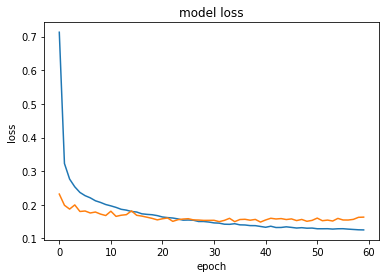

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

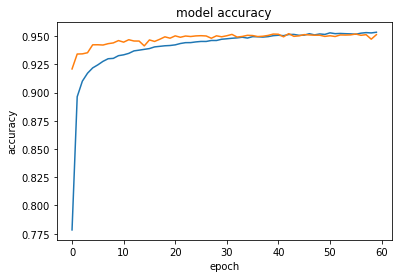

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()